<span style="font-size: 24px; font-weight: bold;">第四章·训练模型</span>

**主要目的**

- 了解黑盒的内部工作流程
- 快速找到恰当机器学习模型、合适的训练算法、和一个好的假设集
- 更好的调试参数和更有效的误差分析

# 线性回归

线性回归预测模型：
$$\hat{y} = h_{\theta}(X) = \theta^{T} \cdot X$$
* $\theta$ 表示模型的参数向量，包括偏置项 $\theta_{0}$ 和特征权重值 $\theta_{1}$ 到 $\theta_{n}$
* $\theta^{T}$ 表示向量 $\theta$ 的转置
* $X$ 为每个样本中特征值的向量形式，包括 $x_{1}$ 到 $x_{n}$，而且 $x_{1}$ 恒为1
* $\theta^{T} \cdot X$ 表示 $\theta^{T}$ 和 $X$ 的点积
* $h_{\theta}$ 表示参数为 $\theta$ 的假设函数

## 评估方法

要想设置一组参数，使得模型在训练集上的表现较好，我们需要首先找到一个衡量模型好坏的评定方法

我们使用均方差来评估模型：
$$MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{T} \cdot X^{(i)} - y^{(i)}) ^ 2$$

## 公式解

要找到最小化损失函数的 $\theta$ 值，可以采用公式解
$$\hat{\theta} = (X^T \cdot X) ^ {-1} \cdot X^T \cdot y$$
下面来测试一下这个方程

In [68]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
warnings.filterwarnings('ignore', message=r".*?scipy.*?")

[[4.03557103]
 [2.89528283]]


模型的图像长这个样子

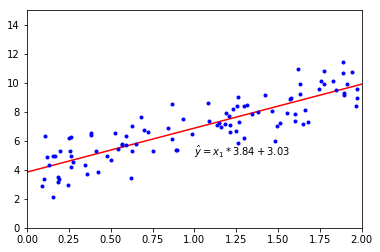

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
_ = plt.text(1, 5, "$\hat{y}=x_{1}*%s+%s$" % (round(theta_best[0][0], 2), round(theta_best[1][0], 2)))

### 计算复杂度

需要计算 $X^T \cdot X$ 的逆，它是一个 $n * n$ 的矩阵($n$是特征个数)。运算复杂度大约在 $O(n^{2.4})$ 到 $O(n^{3})$ 之间。即：如何你将特征个数翻倍，其计算时间大致变为原来的 $5.3(2^{2.4})$ 到 $8(2^3)$ 倍。

**特征数量较大时，正态方程求解将会非常慢**

一个好消息是，这个方程在训练集上对于每一个实例来说是线性的，其复杂度为 $O(m)$。因此你的内存如果放得下，你就可以对大规模数据进行训练。而预测是非常快的。当实例个数变为原来2倍多时，预测时间也仅仅是原来的2倍多。

## 梯度下降

通过迭代来逐渐调整参数使得损失函数达到最小值

通过控制步长来控制算法的迭代

**超参数学习率**决定了步长的大小
1. 学习率太大：将跳过最低点，甚至使算法发散
2. 学习率太小：学习速度缓慢，非常耗时
3. 局部最小值：非**凸函数**的优化，都可能需要这样的问题

**使用梯度下降时，应该确保所有的特征有着相近的尺度范围**

### 批量梯度下降

偏导数：求得梯度

$$\nabla_{\theta}MSE(\theta) = \left ( \begin{matrix} \frac{\partial}{\partial\theta_{0}}MSE(\theta)\\ \frac{\partial}{\partial\theta_{1}}MSE(\theta)\\ \vdots \\ \frac{\partial}{\partial\theta_n}MSE(\theta) \end{matrix}  \right ) = \frac{2}{m}X^T \cdot (X \cdot \theta - y)$$

梯度下降步长

$$\theta^{(next\ step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$$

***梯度下降运算规模和特征数量成正比，训练一个数千维度的线性回归模型要比正态方程快得多**

In [26]:
eta = 0.1  # 学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [28]:
theta

array([[3.84334927],
       [3.03251508]])

很不错，和正态方程的结果几乎相同

超参数：容差($\varepsilon$)

用于解决不知如何选取迭代次数的问题

如果梯度向量小于容差，那么结束迭代。

> 当损失函数是**凸函数**，同时它的**斜率不能突变**，那么它的批量梯度下降算法固定学习率之后，它的收敛速率是 $O(\cfrac{1}{iterations})$ 。也就是说，如果将容差缩小10倍后，这个算法的迭代次数大约会变成原来的10倍。(会更精确)

### 随机梯度下降

每次迭代只选择一个训练集

- 它呈现更多的不规律性：它达到最小值不是平缓的下降、损失函数忽高忽低，大体趋势下降。
- 不会停止在一个值上，而是一直在这个值附近摆动。
- 最后的参数还不错，但不是最优值

优势：
- 当损失函数很不规则时，随机梯度下降能够跳过局部最小值。

模拟退火：解决他能够跳过局部最小值但是不能到达最小值的方法

learning schedule 去降低学习速率

In [47]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_schedule(i + epoch * m) * gradients

In [48]:
theta

array([[3.78846665],
       [3.00941842]])

我们将 `learning_schedule(i + epoch * m)` 替换为 `eta` ，会发现，theta会很不稳定

我们用 `sklearn` 的 `SGDRegressor` 来试一试

In [49]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [50]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.824963]), array([3.01450048]))

结果和我们的，非常一致

### 小批量梯度下降

使用一个随机的小型实例集

优点：
- 通过矩阵运算的硬件优化
- 在参数空间上的表现比SGD好得多
- 更靠近最小值

问题：
- 有可能陷在局部最小值中

比较线性回归不同梯度下降算法

In [54]:
import pandas as pd

columns = ["Algorithm", "Large m", "Out-of-core support", "Large n", "Hyperparams", "Scaling required", "Scikit-Learn"]
linear_data_table = [
    ["Normal Equation", "Fast", "No", "Slow", "0", "No", "LinearRegression"],
    ["Batch GD", "Slow", "No", "Fast", "2", "Yes", "n/a"],
    ["Stochastic GD", "Fast", "Yes", "Fast", ">=2", "Yes", "SGDRegressor"],
    ["Mini-batch GD", "Fast", "Yes", "Fast", ">=2", "Yes", "n/a"]
]
df = pd.DataFrame(linear_data_table, columns=columns)
df

,Algorithm,Large m,Out-of-core support,Large n,Hyperparams,Scaling required,Scikit-Learn
0,Normal Equation,Fast,No,Slow,0,No,LinearRegression
1,Batch GD,Slow,No,Fast,2,Yes,n/a
2,Stochastic GD,Fast,Yes,Fast,>=2,Yes,SGDRegressor
3,Mini-batch GD,Fast,Yes,Fast,>=2,Yes,n/a


# 多项式回归

含义：对每个特征进行加权后作为新的特征，然后训练一个线性模型在这个扩展的特征集上。

一些非线性数据

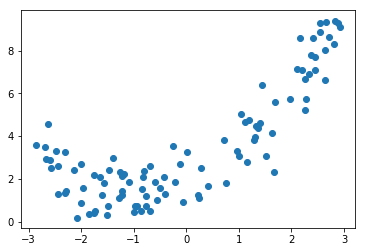

In [79]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
_ = plt.scatter(X, y)

需要进行训练数据集转换

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [81]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88138658]), array([[1.04634685, 0.52643591]]))

In [82]:
predict_func = lambda x: lin_reg.coef_[0][1] * x ** 2 + lin_reg.coef_[0][0] * x + lin_reg.intercept_[0]

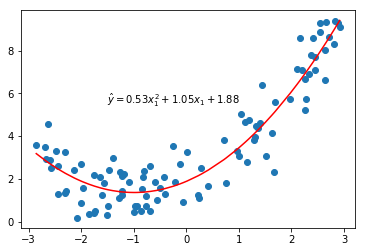

In [91]:
plt.scatter(X, y)
X_ = sorted(X)
y_ = [predict_func(x) for x in X_] 
plt.plot(X_, y_, color='r')
_ = plt.text(-1.5, 5.5, "$\hat{y}=%sx_1^2 + %sx_1 + %s$" % (round(lin_reg.coef_[0][1], 2), round(lin_reg.coef_[0][0], 2), round(lin_reg.intercept_[0], 2)))

原始函数为 $y=0.5x_1^2 + 1.0x_1 + 2.0$ 再加上一些高斯噪声

**当存在多个特征时，多项式回归能够找出特征之间的关系**

把一个包含n个特征的数组转换为包含 $N$ 个特征的数组：
$$N = \frac{(n + d) !}{d!n!}$$
其中 $d$ 为 `degree`

**小心大量的特征组合爆炸**

## 学习曲线

过拟合判断：训练集表现的好，交叉验证指标却得出泛化能力很差

欠拟合判断：两方面表现都不好

另一种方法是观察学习曲线

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y, ylim=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val set")
    if ylim:
        plt.ylim(ylim)
    plt.legend()

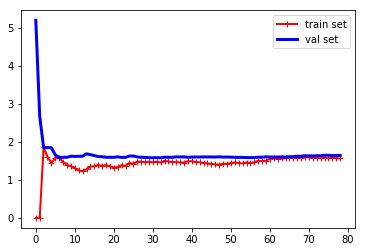

In [135]:
plot_learning_curve(LinearRegression(), X, y)

训练集上：

1. 当只有一两个样本的时候，模型能够很好的拟合
2. 加入新的数据后，拟合程度变得难以接受：
    - 数据中有噪声
    - 数据不是线性的
3. 达到高原地带并趋于稳定

验证集：

1. 非常少的样本训练时，不能很好的泛化
2. 训练样本变多，验证误差缓慢下降
3. 最后误差会在高原地带趋于稳定

**因为一条直线不能很好地拟合数据集，出现了欠拟合**

**我们需要更复杂的模型或更好的特征**

下面是一个过拟合的学习曲线

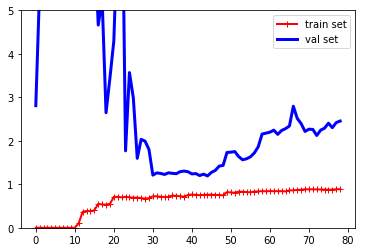

In [138]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression())
])
plot_learning_curve(polynomial_regression, X, y, ylim=[0, 5])

1. 训练集上的误差要比线性回归模型低得多
2. 两条曲线有间隔，这也是过拟合的显著特点。

泛化误差由三个不同误差的和决定：
1. 偏差：错误的假设。(欠拟合)
2. 方差：模型对训练数据的微小变化较为敏感。多自由度的模型更容易有高方差。(过拟合)
3. 不可约误差：数据本身的噪声。(数据清洗是降低这一部分误差的唯一方法：修复数据源、坏的传感器、识别和剔除异常值)

## 正则化

约束模型的自由度，让其难以过拟合。

### 岭回归(Ridge)

又称Tikhonov正则化，是线性回归的正则化版，在损失函数上加上正则项 $\alpha\sum_{i=1}^n\theta_i^2$ 。

这样算法不仅能拟合数据，还能使模型的参数权重尽量小。

**只在训练过程会加入正则项**

> 训练过程中损失函数和测试过程中的评价函数不一样<br>
> 训练中：易于求导<br>
> 测试中：接近最后的客观表现

岭回归损失函数：
$$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$$
$\theta_0$ 是没有被正则化的

**正则化前，对数据进行缩放非常重要**

封闭方程的解：
$$\hat{\theta} = (X^T \cdot X + \alpha A)^{-1} \cdot X^T \cdot y$$

In [144]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print("Ridge:", ridge_reg.predict([[1.5]]))
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000)
sgd_reg.fit(X, y.ravel())
print("SGD:", sgd_reg.predict([[1.5]]))

Ridge: [[5.29787276]]
SGD: [5.3038548]


另一句话说， `l2` 就是简单的岭回归

### Lasso回归

也称 `Least Absolute Shrinkage` 或者 `Selection Operator Regression`

他使用的是权重向量的 `l1` 范数

Lasso回归的损失函数：
$$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n\lvert\theta_i\rvert$$
**特性：倾向于完全消除最不重要的特征的权重(自动进行特征选择)**

**Lasso损失函数中，批量梯度下降的路劲趋向于在低谷有一个反弹。为了真正收敛到全局最小值，应该逐渐降低学习率**

Lasso在 $\theta_i=0(i=1,2,\cdots,n)$ 处无法微分。使用子梯度向量可以在任务 $\theta_i=0$ 的情况下计算。
公式：
$$g(\theta, J) = \nabla_{\theta}MSE(\theta) + \alpha \left(\begin{matrix} sign(\theta_1) \\ sign(\theta_2) \\ \vdots \\ sign(\theta_n)\end{matrix}\right)\ where\ sign(\theta_i) = \begin{cases}-1, & \theta_i < 0\\0, & \theta_i = 0 \\ +1, & \theta_i > 0\end{cases}$$

In [146]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print("Lasso:", lasso_reg.predict([[1.5]]))

Lasso: [5.25524894]


### 弹性网络（ElasticNet）

介于Ridge和Lasso之间。$r$ 是混合率。

公式：
$$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$$

正则化的选择：

1. 岭回归是个好的首选项
2. 特征仅少数有用，选择Lasso或者弹性网络
3. 一般来说，弹性网络比Lasso表现好

**特征数量比样本数量大时，或者特征之间有很强相关性，Lasso可能会表现的不规律**

In [147]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio即r
elastic_net.fit(X, y)
print("ElasticNet:", elastic_net.predict([[1.5]]))

ElasticNet: [5.25159673]


### 早起停止法（Early Stopping）

梯度下降在验证错误达到最小值时立即停止训练

*完美的免费午餐*

> 随机梯度和小批量梯度下降不是平滑的，很难知道最小值在哪。<br>
> 只有验证误差高于最小值一段时间后，才停止，然后回滚参数

In [165]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")  # 最大值
best_epoch = None
best_model_weight = None
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
for epoch in range(1000):
    sgd_reg.fit(X_train, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val_predict, y_val.ravel())
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model_weight = {'coef': sgd_reg.coef_, 'intercept': sgd_reg.intercept_}
print("Best epoch:", best_epoch)
print("Best model weight:", best_model_weight)

Best epoch: 281
Best model weight: {'coef': array([1.2626523]), 'intercept': array([3.51756572])}


**`sklearn` 中 `clone` 之后的模型，需要重新fit，顾只保存了模型的参数即可**

# 分类

## Logistic

逻辑回归的概率估计：
$$\hat{p} = h_{\theta}(X) = \sigma(\theta^T \cdot X)$$

Logistic函数，用 $\sigma()$ 表示。是一个 `sigmoid` 函数。
$$\sigma(t) = \frac{1}{1+exp^{(-t)}}$$

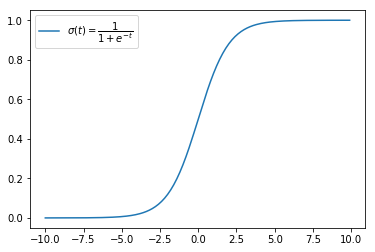

In [180]:
def sigmoid(X):
    return 1. / (1 + np.exp(-X))

X_sig = np.arange(-10, 10, 0.1)
y_sig = sigmoid(X_sig)
plt.plot(X_sig, y_sig, label='$\sigma(t)=\dfrac{1}{1+e^{-t}}$')
_ = plt.legend()

逻辑回归预测模型：
$$\hat{y} = \begin{cases}0, & \hat{p} < 0.5 \\ 1, & \hat{p} ≥ 0.5 \end{cases}$$

### 训练和损失函数

单个样本的损失函数：
$$c(\theta) = \begin{cases}-log(\hat{p}), & y=1 \\ -log(1 - \hat{p}), & y = 0 \end{cases}$$

整个训练集的损失函数只是所有训练实例的平均值，可以用一个表达式来表示

逻辑回归的损失函数(对数损失)：
$$J(\theta) = -\dfrac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]$$

这个损失函数没有公式解，但是是凸的：
$$\dfrac{\partial}{\partial\theta_j}J(\theta_j) = \dfrac{1}{m}\sum_{i=1}^m(\sigma(\theta^T \cdot X^{(i)}) - y^{(i)})x_j^{(i)}$$

### 决策边界

我们使用莺尾花数据集来进行之后的分析，首先，仅仅使用花瓣的宽度特征来识别Virginica

In [182]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [183]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

下面看看模型估计的花瓣宽度从0到3厘米的概率估计

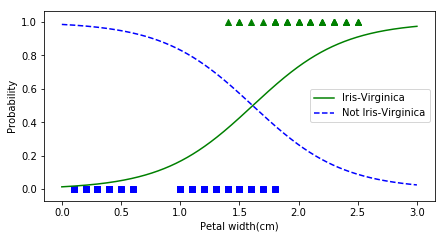

In [198]:
X_new= np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(7, 3.5))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
vir_x = X[y == 1]
not_vir_x = X[y == 0]
plt.scatter(vir_x, [1] * len(vir_x), c="g", marker="^")
plt.scatter(not_vir_x, [0] * len(not_vir_x), c="b", marker="s")
plt.xlabel("Petal width(cm)")
plt.ylabel("Probability")
_ = plt.legend()

在两条曲线交点处，是一个决策边界所在。
- 在大约2厘米以上时，分类器非常肯定这朵花是Virginica
- 在1厘米以下时，分类器非常肯定这朵花不是Virginica
- 在这两端之间，分类器是不确定的。它将返回一个最可能的结果。

`LogisticRegression` 模型中控制正则化强度的超参数是 $C$，它是 $\alpha$ 的逆。 $C$ 越大，模型正则化强度越低。

## Softmax

逻辑回归模型可以直接推广到支持多类别分类。

给定一个实例$x$，首先计算$k$类的分数$s_k(x)$，然后应用在 `Softmax` 函数上，估计每类的概率。

$k$类的 `Softmax` 得分
$$s_k(x) = \theta_k^T \cdot x$$
每个类都有自己独一无二的参数向量$\theta_k$

`Softmax` 函数：
$$\hat{p_k} = \sigma(s(X))_k = \dfrac{exp(s_k(X))}{\sum_{j=1}^K exp(s_j(X))}$$

- $K$表示有多少类
- $s(X)$表示包含样本X每一类得分的向量
- $\sigma(s(X))_k$表示给定每一类分数之后，实例$X$属于第$k$类的概率

`Softmax` 回归模型分类器预测结果
$$\hat{y} = argmax\ \sigma(s(X))_k = argmax\ s_k(X) = argmax\ (\theta_k^T \cdot X)$$

**`Softmax`回归一次只能预测一个类，因此它只能用于判断互斥的类别**

使用交叉熵来定义该模型的损失函数：
$$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^{(i)}log(\hat{p_k}^{(i)})$$
- 如果对于第$i$个实例的目标类是$k$，那么$y_k^{(i)}=1$，反之$y_k^{(i)}=0$

> KL散度<br>
> 两个概率分布$p$和$q$之间的交叉熵定义为：$$H(p, q)=-\sum_x p(x)log q(x)$$(分布至少是离散的)

$k$ 类交叉熵的梯度向量
$$\nabla_{\theta_k}J(\Theta) = \frac{1}{m}\sum_{i=1}^m(\hat{p_k}^{(i)}-y_k^{(i)})X^{(i)}$$

In [199]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
softmax_reg.predict([[5, 2]])

array([2])